In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
data = pd.read_csv("..\\data\\InflationDataPerCountry.csv")

In [16]:
### Grabbing the US Data from the file
us_df = data[data['Country Name'] == 'United States']
us_df = us_df.drop(columns=['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name']).T.rename(columns={
    251: "inflation_rate"
})
us_df.index = us_df.index.astype(int)
us_df.index.rename('Year', inplace=True)

In [17]:
### Load congressional data
congress_data = pd.read_csv('..\\data\\GovernmentDataPerYear.csv', delimiter='\t', index_col='Year')

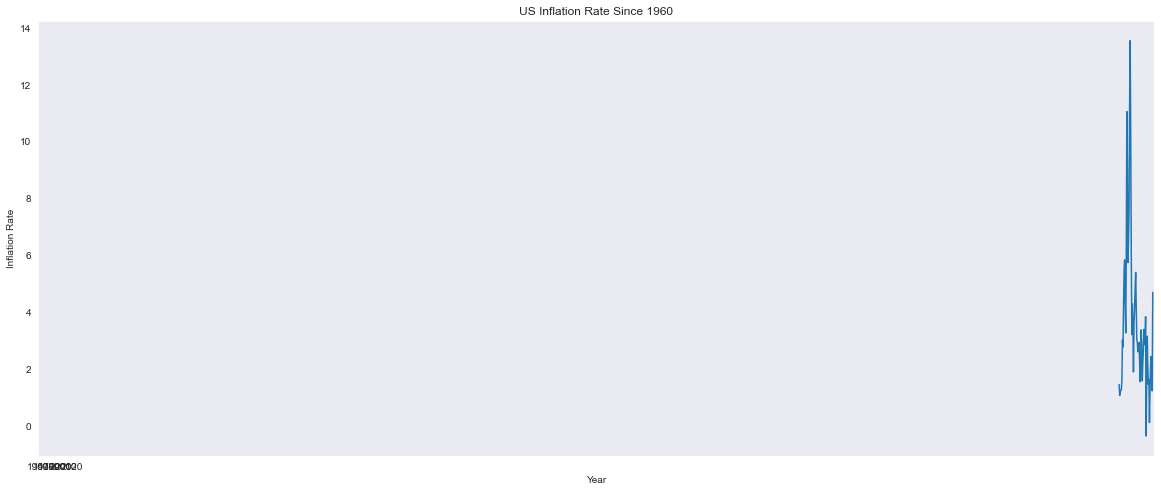

In [18]:
sns.set_style("dark")
plt.figure(figsize=(20,8))
plot = sns.lineplot(x=us_df.index, y=us_df.inflation_rate)
plot.set(title="US Inflation Rate Since 1960", xlabel='Year', ylabel='Inflation Rate')
plt.xticks(
    [0, 10,20, 30, 40, 50, 60],
    ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
);

In [19]:
### Process to make it per year
cpi_df = pd.read_csv("..\\data\\cpiDataPerMonth.csv", parse_dates=[0])
cpi_df['MONTH'] = cpi_df['DATE'].dt.month
cpi_df = cpi_df[cpi_df['MONTH'] == 12]
cpi_df['YEAR'] = cpi_df['DATE'].dt.year
cpi_df = cpi_df.drop(columns=['DATE', 'MONTH'])
cpi_df = cpi_df.reset_index(drop=True)
cpi_df = cpi_df.set_index('YEAR')
cpi_df = cpi_df.rename(columns={
    'USACPIALLMINMEI' : 'CPI'
})
cpi_df.index.rename('Year', inplace=True)

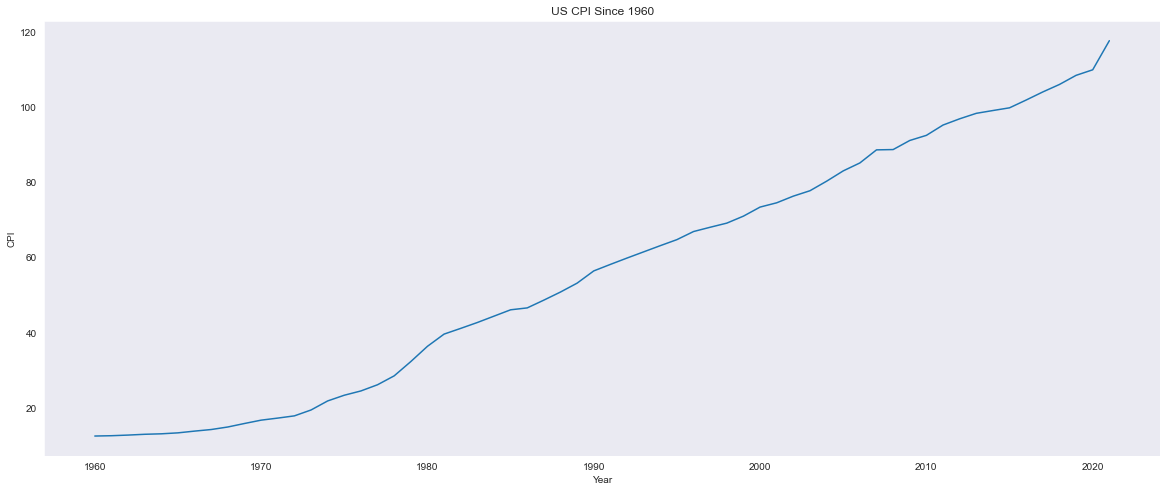

In [20]:
### EDA Plot
sns.set_style("dark")
plt.figure(figsize=(20,8))
plot = sns.lineplot(x=cpi_df.index, y=cpi_df.CPI)
plot.set(title="US CPI Since 1960", xlabel='Year', ylabel='CPI');

In [22]:
from sklearn.preprocessing import OneHotEncoder
### Create the full df
full_df = us_df.join(congress_data).join(cpi_df)
### One Hot encode party stuff
ohe = OneHotEncoder(sparse=False)
ohe_fit = ohe.fit_transform(full_df[['Party', ' Congress Maj Party']])
ohe_fit = pd.DataFrame(ohe_fit).rename(columns={
    0: "DemPresParty",
    1: 'RepPresParty',
    2: 'DemCongParty',
    3: 'RepCongParty'
})
for col in ohe_fit.columns:
    ohe_fit[col] = ohe_fit[col].astype(int)
ohe_fit['Year'] = list(range(1960, 2022))
ohe_fit.set_index('Year', inplace=True)
sal_df = pd.read_csv('..\\data\\averageSalary.csv', index_col='Year')
### Final Data Preprocessing Step
full_df = full_df.drop(columns=['Name', 'Party', ' Congress Maj Party', 'Congress Min Party']).join(ohe_fit).join(sal_df)

,DemPresParty,RepPresParty,DemCongParty,RepCongParty
Year,,,,
1960,0,1,1,0
1961,1,0,1,0
1962,1,0,1,0
1963,1,0,1,0
1964,1,0,1,0
...,...,...,...,...
2017,0,1,0,1
2018,0,1,0,1
2019,0,1,0,1
